# Face Recognition Model Benchmark — Results Analysis

This notebook loads the benchmark results from `results/benchmark_results.json` and provides interactive visualization.

In [2]:
import json
import subprocess
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# Find project root via git
_root = Path(subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True).strip())
RESULTS_PATH = _root / "results" / "benchmark_results.json"

with open(RESULTS_PATH) as f:
    results = json.load(f)

print(f"Loaded results for {len(results)} models: {list(results.keys())}")

Loaded results for 4 models: ['OpenCV SFace', 'AuraFace', 'DeepFace GhostFaceNet', 'Dlib ResNet-34']


## Summary Table

In [3]:
header = f"{'Model':<25} {'AUC':>8} {'EER':>8} {'TAR@1%':>10} {'TAR@0.1%':>10} {'Pairs':>7} {'Skip':>6} {'Fail%':>7}"
print(header)
print('-' * len(header))
for name, r in results.items():
    total = r['num_pairs'] + r['num_skipped']
    fail_rate = r['num_skipped'] / total if total > 0 else 0
    print(
        f"{name:<25} "
        f"{r['auc']:>8.4f} "
        f"{r['eer']:>8.4f} "
        f"{r['tar_at_far_001']:>10.4f} "
        f"{r['tar_at_far_0001']:>10.4f} "
        f"{r['num_pairs']:>7d} "
        f"{r['num_skipped']:>6d} "
        f"{fail_rate:>6.2%}"
    )

Model                          AUC      EER     TAR@1%   TAR@0.1%   Pairs   Skip   Fail%
----------------------------------------------------------------------------------------
OpenCV SFace                0.9957   0.0210     0.9680     0.9303    6000      0  0.00%
AuraFace                    0.9986   0.0103     0.9890     0.9473    5996      4  0.07%
DeepFace GhostFaceNet       0.9506   0.0988     0.8433     0.7753    6000      0  0.00%
Dlib ResNet-34              0.9993   0.0083     0.9920     0.9715    5176    824 13.73%


## ROC Curves (Linear Scale)

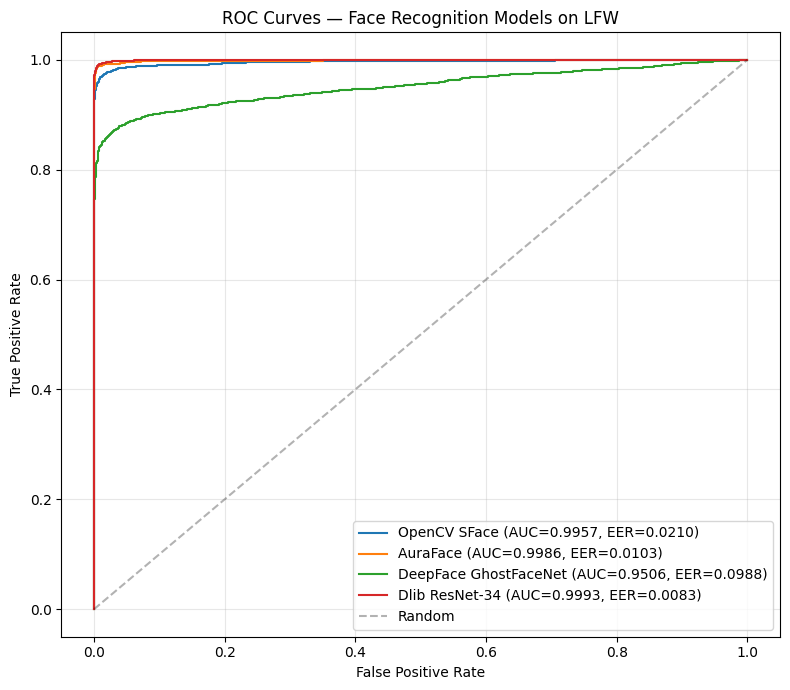

In [4]:
fig, ax = plt.subplots(figsize=(8, 7))
for name, r in results.items():
    fpr = np.array(r['fpr'])
    tpr = np.array(r['tpr'])
    if len(fpr) == 0:
        continue
    ax.plot(fpr, tpr, label=f"{name} (AUC={r['auc']:.4f}, EER={r['eer']:.4f})")

ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves — Face Recognition Models on LFW')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

## ROC Curves (Log Scale)

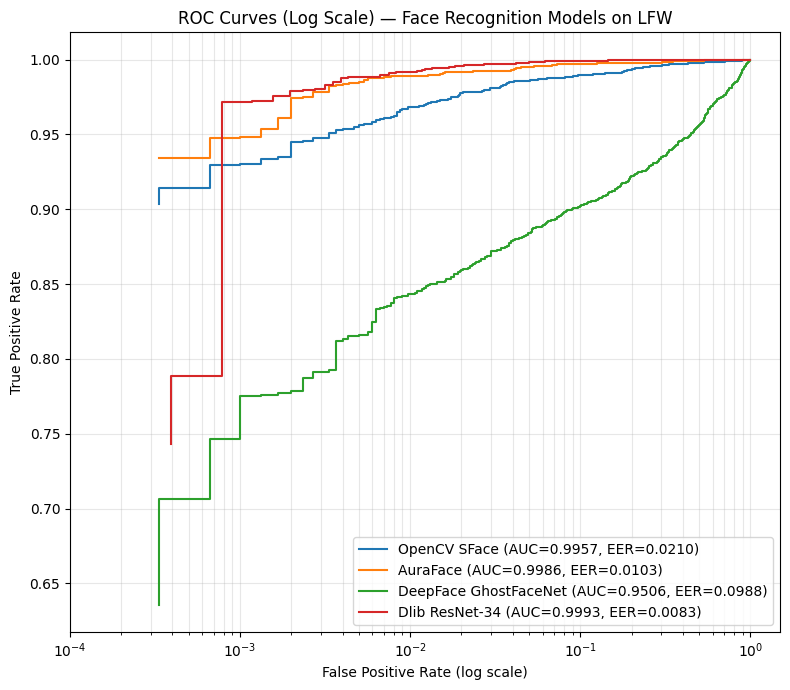

In [5]:
fig, ax = plt.subplots(figsize=(8, 7))
for name, r in results.items():
    fpr = np.array(r['fpr'])
    tpr = np.array(r['tpr'])
    if len(fpr) == 0:
        continue
    mask = fpr > 0
    ax.plot(fpr[mask], tpr[mask], label=f"{name} (AUC={r['auc']:.4f}, EER={r['eer']:.4f})")

ax.set_xscale('log')
ax.set_xlabel('False Positive Rate (log scale)')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves (Log Scale) — Face Recognition Models on LFW')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3, which='both')
ax.set_xlim(left=1e-4)
fig.tight_layout()
plt.show()